In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# city_df.head()

In [3]:
# check to see if any cities in the ride data are not in the city lookup table list (just for fun!)

# grab all of the unique values from the city column in the "ride" data and convert it to a list
unique_cities_in_ride_data = pd.DataFrame(ride_df["city"].unique())[0].tolist()

# grab all of the unique values from the city column in the "city" data and convert it to a list
# yes I realize this is probably already a unique list, but might as well be sure!
cities_from_cities_data_list = pd.DataFrame(city_df["city"].unique())[0].tolist()

# loop through the list of cities from the "ride" data and check to see that it also appears in the "cities" data
# create an array of booleans that is True/False depending on whether the city in the "ride" data appears in "cities" data
# this way the index of the truthArray lines up with the index of the "unique_cities_in_ride_data"
truthArray = []

for city in unique_cities_in_ride_data:
    truthArray.append(city in cities_from_cities_data_list)

# counts the unique values in the array. If there is a city missing, you will see a "False" alongside a "True"
pd.Series(truthArray).unique()


# another way of doing this with less lines but harder to read
# unique_cities_in_ride_data = pd.DataFrame(ride_df["city"].unique()).sort_values([0],ascending=True).reset_index(drop=True)
# cities_from_cities_data_list = pd.DataFrame(city_df["city"].unique()).sort_values([0],ascending=True).reset_index(drop=True)

# cities_from_cities_data_list.equals(unique_cities_in_ride_data)

array([ True])

In [4]:
# Combine the data into a single dataset
data_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
data_df.tail(30)

,city,date,fare,ride_id,driver_count,type
2345,West Heather,2018-02-04 16:29:23,13.97,7118893881453,4,Rural
2346,West Heather,2018-04-18 19:33:12,46.60,3671003215967,4,Rural
2347,West Heather,2018-03-02 21:04:10,20.99,5766454453070,4,Rural
2348,South Saramouth,2018-01-28 15:55:33,31.25,7118046558393,7,Rural
2349,West Heather,2018-03-06 20:06:51,48.11,2570548892682,4,Rural
2350,Garzaport,2018-05-06 16:57:16,18.90,8826696981094,7,Rural
2351,South Saramouth,2018-03-27 21:07:16,11.87,170351888128,7,Rural
2352,Randallchester,2018-04-07 23:42:07,10.79,1615474447641,9,Rural
2353,Harringtonfort,2018-01-09 15:30:35,31.84,3730685356921,4,Rural
2354,South Saramouth,2018-04-12 18:11:50,57.23,5081198789583,7,Rural


## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates (and size) for each of the three city types

# grab the data for all of the Rural cities
# filter out all the "Rural" cities with a "loc" command
# then groupby "city" to make a groupby object that has the per/city information
rural_cities_groupby = data_df.loc[data_df["type"] == "Rural", :].groupby("city")

# count the number of rows by grabbing the "city" column and counting how many of each there are
x_total_rides_rural = rural_cities_groupby["city"].count()

# get the average fare for each "city" by averaging the "fare" for each city
y_avg_fare_rural = rural_cities_groupby["fare"].mean()

# get the count of drivers "city" by averaging the "driver_count" for each city
# since it's the same number for each city, the average will just be the count
size_driver_count_rural = rural_cities_groupby["driver_count"].mean()


# do this for all of the Suburban cities
suburban_cities_groupby = data_df.loc[data_df["type"] == "Suburban", :].groupby("city")
x_total_rides_suburban = suburban_cities_groupby["city"].count()
y_avg_fare_suburban = suburban_cities_groupby["fare"].mean()
size_driver_count_suburban = suburban_cities_groupby["driver_count"].mean()


# do this for all of the Urban cities
urban_cities_groupby = data_df.loc[data_df["type"] == "Urban", :].groupby("city")
x_total_rides_urban = urban_cities_groupby["city"].count()
y_avg_fare_urban = urban_cities_groupby["fare"].mean()
size_driver_count_urban = urban_cities_groupby["driver_count"].mean()
y_avg_fare_rural

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

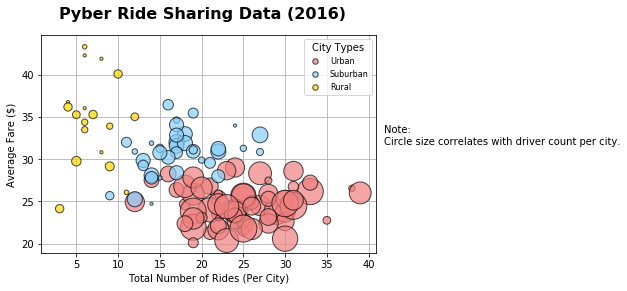

In [5]:
# Build the scatter plots for each city types
fig, ax = plt.subplots()

ax.scatter(x_total_rides_urban, 
           y_avg_fare_urban, 
           s=size_driver_count_urban*10,
           c="lightcoral", 
           #c="#f08080", 
           alpha=0.7, 
           edgecolor="black", 
           label='Urban',
           zorder=3)

ax.scatter(x_total_rides_suburban, 
           y_avg_fare_suburban, 
           s=size_driver_count_suburban*10,
           c="lightskyblue", 
           #c="#87cefa", 
           alpha=0.7, 
           edgecolor="black", 
           label='Suburban',
           zorder=4)

ax.scatter(x_total_rides_rural, 
           y_avg_fare_rural, 
           s=size_driver_count_rural*10, 
           c="gold", 
           alpha=0.7, 
           edgecolor="black", 
           label='Rural',
           zorder=5)


# Incorporate the other graph properties
fig.suptitle("Pyber Ride Sharing Data (2016)", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 40)
# ax.set_ylim(18, 45)

ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")

ax.grid(zorder=1)

# Create a legend
lgnd = ax.legend(loc='upper right', title="City Types", fontsize=8)   #, fancybox=True)

lgnd.get_title().set_fontsize('10')

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
# use the xlim and yaxis intervals to place the label 
# 2 ticks to the right of xlim and halfway between the top/bottom y values
text_artist = ax.text(ax.get_xlim()[1] + 1,
        ax.get_yaxis().get_data_interval().mean(), 
        "Note:" + "\n" + "Circle size correlates with driver count per city.")

# show the plot
plt.show()


# figure_width = fig.get_size_inches()[0]
# print(figure_width)

# artist_list = []
# artist_list.append(text_artist)



# Save Figure
fig.savefig("./saved_figures/BUBBLE_ride_sharing_data.png", bbox_inches='tight')


## Total Fares by City Type

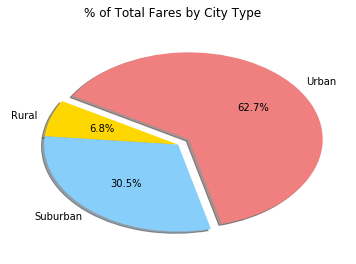

In [6]:
# Calculate Type Percents
# to get the total amount of fares per city type
# group by "type" and then grab the "fare" column and calculate the sum
# this will return a dataframe with index being the city type, and first column being the sum for that city type
total_fares_by_citytype = data_df.groupby("type")["fare"].sum()

# now just divide each city type's fare total by the sum of all totals
fare_percent_by_citytype = total_fares_by_citytype / total_fares_by_citytype.sum()

# Build Pie Chart
labels = fare_percent_by_citytype.index.tolist()

sizes = fare_percent_by_citytype.tolist()

colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
# set explode to only happen for the largest piece of the pie
explode_index = sizes.index(max(sizes))
explode = np.zeros(3).tolist()
explode[explode_index] = 0.1


fig, ax = plt.subplots()

fig.suptitle("% of Total Fares by City Type")

ax.pie(sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=150)


# Show Figure
plt.show()

# Save Figure
fig.savefig("./saved_figures/PIE_Total_Fares_Percent_By_City_Type.png")


## Total Rides by City Type

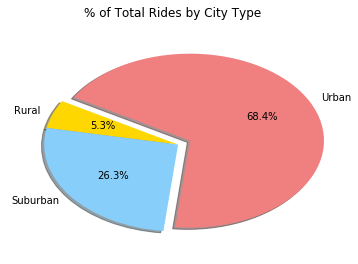

In [7]:
# Calculate Ride Percents
# to get the total number of rides per city type
# group by "type" and then grab any column ("city in this case") and count the number of rows
# this will return a dataframe with index being the city type, and first column being the count of rides for that city type
total_rides_by_citytype = data_df.groupby("type")["city"].count()

# now just divide each city type's total ride count by the sum of all totals
ride_percent_by_citytype = total_rides_by_citytype / total_rides_by_citytype.sum()

# Build Pie Chart
labels = ride_percent_by_citytype.index.tolist()

sizes = ride_percent_by_citytype.tolist()

colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
# set explode to only happen for the largest piece of the pie
explode_index = sizes.index(max(sizes))
explode = np.zeros(3).tolist()
explode[explode_index] = 0.1

fig, ax = plt.subplots()

fig.suptitle("% of Total Rides by City Type")

ax.pie(sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=150)


# Show Figure
plt.show()

# Save Figure
fig.savefig("./saved_figures/PIE_Total_Ride_Percent_By_City_Type.png")


## Total Drivers by City Type

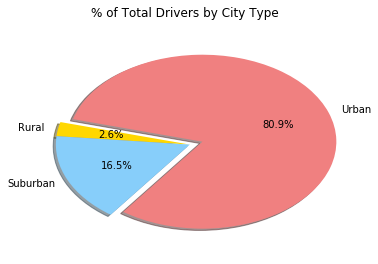

In [8]:
# Calculate Driver Percents
# to get the total number of drivers per city type
# grab the "city", "type", and "driver_count" columns and drop duplicate rows
# this works since each "city" only has one "type" and one "driver_count" associated with it
# essentially we are re-creating the original "city_data" CSV
# then group by "type" and sum all of the driver_counts together
# this will return a dataframe with index being the city type, and first column being the sum of drivers for that city type
total_drivers_by_citytype = data_df[["city","type","driver_count"]].drop_duplicates().groupby("type").sum()

# now just divide each city type's total driver count by the sum of all totals
drivers_percent_by_citytype = total_drivers_by_citytype / total_drivers_by_citytype.sum()

# Build Pie Chart
labels = drivers_percent_by_citytype.index.tolist()

sizes = drivers_percent_by_citytype["driver_count"].tolist()

colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
# set explode to only happen for the largest piece of the pie
explode_index = sizes.index(max(sizes))
explode = np.zeros(3).tolist()
explode[explode_index] = 0.1

fig, ax = plt.subplots()

fig.suptitle("% of Total Drivers by City Type")

ax.pie(sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=165)

# Show Figure
plt.show()

# Save Figure
fig.savefig("./saved_figures/PIE_Total_Drivers_Percent_By_City_Type.png")
